## How to select dataframe subsets from multivariate data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

In [2]:
# Download NHANES 2015-2016 data
df = pd.read_csv("nhanes_2015_2016.csv")

In [3]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


### Keep only body measures columns, so only columns with "BMX" in the name

In [4]:
# get columns names
col_names = df.columns
col_names

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [5]:
# One way to get the column names we want to keep is simply by copying from the above output and storing in a list
keep = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST']

In [6]:
# Another way to get only column names that include 'BMX' is with list comprehension
# [keep x for x in list if condition met]
[column for column in col_names if 'BMX' in column]

['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']

In [11]:
keep = [column for column in col_names if 'BMX' in column]
keep

['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']

In [8]:
# use [] notation to keep columns
df_BMX = df[keep]

In [9]:
df_BMX.head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4


There are two methods for selecting by row and column. 
# link for pandas cheat sheets
* df.loc[row labels or bool, col labels or bool]
* df.iloc[row int or bool, col int or bool]

### [From pandas docs](https://pandas.pydata.org/pandas-docs/stable/indexing.html]):  
* [ ] column indexing
* .loc is primarily label based, but may also be used with a boolean array.   
* .iloc is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

In [10]:
df.loc[:, keep].head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4


In [12]:
index_bool = np.isin(df.columns, keep)

In [13]:
index_bool 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False])

In [14]:
df.iloc[:,index_bool].head() # Indexing with boolean list

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4


### Selection by conditions

In [15]:
# Lets only look at rows who 'BMXWAIST' is larger than the median
waist_median = pd.Series.median(df_BMX['BMXWAIST']) # get the median of 'BMXWAIST'

In [16]:
waist_median

98.3

In [17]:
df_BMX[df_BMX['BMXWAIST'] > waist_median].head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
9,108.3,179.4,33.6,46.0,44.1,38.5,116.0


In [18]:
# Lets add another condition, that 'BMXLEG' must be less than 32
condition1 = df_BMX['BMXWAIST'] > waist_median
condition2 = df_BMX['BMXLEG'] < 32
df_BMX[condition1 & condition2].head() # Using [] method
# Note: can't use 'and' instead of '&'

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
15,80.5,150.8,35.4,31.6,32.7,33.7,113.5
27,75.6,145.2,35.9,31.0,33.1,36.0,108.0
39,63.7,147.9,29.1,26.0,34.0,31.5,110.0
52,105.9,157.7,42.6,29.2,35.0,40.7,129.1
55,77.5,148.3,35.2,30.5,34.0,34.4,107.6


In [19]:
df_BMX.loc[condition1 & condition2, :].head() # Using df.loc[] method
# note that the conditiona are describing the rows to keep

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
15,80.5,150.8,35.4,31.6,32.7,33.7,113.5
27,75.6,145.2,35.9,31.0,33.1,36.0,108.0
39,63.7,147.9,29.1,26.0,34.0,31.5,110.0
52,105.9,157.7,42.6,29.2,35.0,40.7,129.1
55,77.5,148.3,35.2,30.5,34.0,34.4,107.6


In [20]:
# Lets make a small dataframe and give it a new index so can more clearly see the differences between .loc and .iloc
tmp = df_BMX.loc[condition1 & condition2, :].head()
tmp.index = ['a', 'b', 'c', 'd', 'e'] # If you use different years than 2015-2016, this my give an error. Why?
tmp

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
a,80.5,150.8,35.4,31.6,32.7,33.7,113.5
b,75.6,145.2,35.9,31.0,33.1,36.0,108.0
c,63.7,147.9,29.1,26.0,34.0,31.5,110.0
d,105.9,157.7,42.6,29.2,35.0,40.7,129.1
e,77.5,148.3,35.2,30.5,34.0,34.4,107.6


In [21]:
tmp.loc[['a', 'b'],'BMXLEG']

a    31.6
b    31.0
Name: BMXLEG, dtype: float64

In [22]:
tmp.iloc[[0, 1],3]

a    31.6
b    31.0
Name: BMXLEG, dtype: float64

### Common errors and how to read them

### Problem
The above gives: TypeError: unhashable type: 'slice' 

The [ ] method uses hashes to identify the columns to keep, and each column has an associated hash. A 'slice' (a subset of rows and columns) does not have an associated hash, thus causing this TypeError.

In [24]:
tmp.loc[:, 'BMXBMI']

a    35.4
b    35.9
c    29.1
d    42.6
e    35.2
Name: BMXBMI, dtype: float64

In [25]:
tmp.loc[:, 'BMXBMI'].values

array([35.4, 35.9, 29.1, 42.6, 35.2])

### Problem
The above gives: ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

'BMXBMI' is not an integer that is less than or equal number of columns -1, or a list of boolean values, so it is the wrong value type. 

In [0]:
tmp.iloc[:, 2]

In [0]:
tmp.loc[:, 2]

### Problem
The above code gives: ```TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [2] of <class 'int'>```

2 is not one of the labels (i.e. column names) in the dataframe

In [27]:
# Here is another example of using a boolean list for indexing columns
tmp.loc[:, [False, False, True] +[False]*4]

,BMXBMI
a,35.4
b,35.9
c,29.1
d,42.6
e,35.2


In [28]:
tmp.iloc[:, 2]

a    35.4
b    35.9
c    29.1
d    42.6
e    35.2
Name: BMXBMI, dtype: float64

In [29]:
# We can use the .loc and .iloc methods to change values within the dataframe
tmp.iloc[0:3,2] = [0]*3
tmp.iloc[:,2]

a     0.0
b     0.0
c     0.0
d    42.6
e    35.2
Name: BMXBMI, dtype: float64

In [30]:
tmp.loc['a':'c','BMXBMI'] = [1]*3
tmp.loc[:,'BMXBMI']

a     1.0
b     1.0
c     1.0
d    42.6
e    35.2
Name: BMXBMI, dtype: float64

In [31]:
# We can use the [] method when changing all the values of a column
tmp['BMXBMI'] = range(0, 5)
tmp

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
a,80.5,150.8,0,31.6,32.7,33.7,113.5
b,75.6,145.2,1,31.0,33.1,36.0,108.0
c,63.7,147.9,2,26.0,34.0,31.5,110.0
d,105.9,157.7,3,29.2,35.0,40.7,129.1
e,77.5,148.3,4,30.5,34.0,34.4,107.6


In [32]:
# We will get a warning when using the [] method with conditions to set new values in our dataframe
tmp[tmp.BMXBMI > 2]['BMXBMI'] = [10]*2 # Setting new values to a copy of tmp, but not tmp itself
tmp
# You can see that the above code did not change our dataframe 'tmp'. This

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
a,80.5,150.8,0,31.6,32.7,33.7,113.5
b,75.6,145.2,1,31.0,33.1,36.0,108.0
c,63.7,147.9,2,26.0,34.0,31.5,110.0
d,105.9,157.7,3,29.2,35.0,40.7,129.1
e,77.5,148.3,4,30.5,34.0,34.4,107.6


In [33]:
# The correct way to do the above is with .loc or .iloc
tmp.loc[tmp.BMXBMI > 2, 'BMXBMI']  = [10]*2
tmp # Now contains the chances

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
a,80.5,150.8,0,31.6,32.7,33.7,113.5
b,75.6,145.2,1,31.0,33.1,36.0,108.0
c,63.7,147.9,2,26.0,34.0,31.5,110.0
d,105.9,157.7,10,29.2,35.0,40.7,129.1
e,77.5,148.3,10,30.5,34.0,34.4,107.6


# Multivariate Distributions in Python

###### Sometimes we can get a lot of information about how two variables (or more) relate if we plot them together. This tutorial aims to show how plotting two variables together can give us information that plotting each one separately may miss

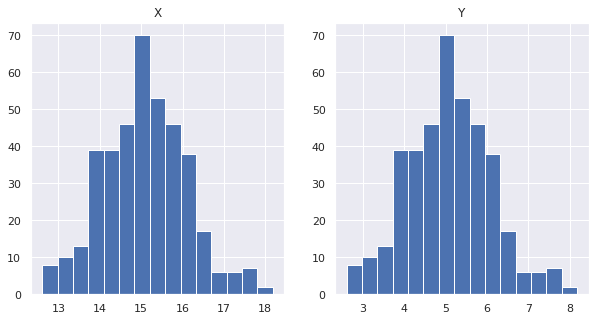

In [36]:
# import the packages we are going to be using
import numpy as np # for getting our distribution
import matplotlib.pyplot as plt # for plotting
import seaborn as sns; sns.set() # For a different plotting theme

# Don't worry so much about what rho is doing here
# Just know if we have a rho of 1 then we will get a perfectly
# upward sloping line, and if we have a rho of -1, we will get 
# a perfectly downward slopping line. A rho of 0 will 
# get us a 'cloud' of points
r = 1

# Don't worry so much about the following three lines of code for now
# this is just getting the data for us to plot
mean = [15, 5]
cov = [[1, r], [r, 1]]
x, y = x, y = np.random.multivariate_normal(mean, cov, 400).T

# Adjust the figure size
plt.figure(figsize=(10,5))

# Plot the histograms of X and Y next to each other
plt.subplot(1,2,1)
plt.hist(x = x, bins = 15)
plt.title("X")

plt.subplot(1,2,2)
plt.hist(x = y, bins = 15)
plt.title("Y")

plt.show()

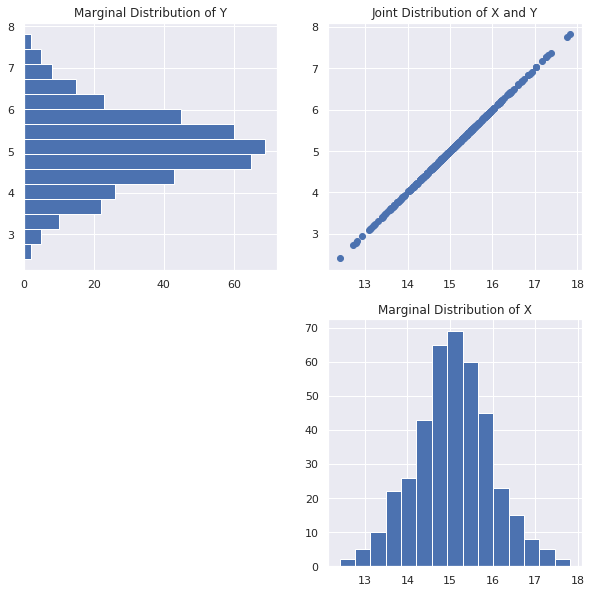

In [35]:
# Plot the data
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.scatter(x = x, y = y)
plt.title("Joint Distribution of X and Y")

# Plot the Marginal X Distribution
plt.subplot(2,2,4)
plt.hist(x = x, bins = 15)
plt.title("Marginal Distribution of X")


# Plot the Marginal Y Distribution
plt.subplot(2,2,1)
plt.hist(x = y, orientation = "horizontal", bins = 15)
plt.title("Marginal Distribution of Y")

# Show the plots
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

In [2]:
# Download NHANES 2015-2016 data
df = pd.read_csv("nhanes_2015_2016.csv")
df.index = range(1,df.shape[0]+1)

In [3]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
1,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
2,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
3,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
4,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
5,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


### Goal
We want to find the mean of first 100 rows of 'BPXSY1' when 'RIDAGEYR' > 60

In [4]:
# One possible way of doing this is:
pd.Series.mean(df[df.RIDAGEYR > 60].loc[range(0,100), 'BPXSY1']) 
# Current version of python will include this warning, older versions will not

139.57142857142858

In [5]:
# test our code on only ten rows so we can easily check
test = pd.DataFrame({'col1': np.repeat([3,1],5), 'col2': range(3,13)}, index=range(1,11))
test

,col1,col2
1,3,3
2,3,4
3,3,5
4,3,6
5,3,7
6,1,8
7,1,9
8,1,10
9,1,11
10,1,12


In [6]:
# pd.Series.mean(df[df.RIDAGEYR > 60].loc[range(0,5), 'BPXSY1'])
# should return 5

pd.Series.mean(test[test.col1 > 2].loc[range(0,5), 'col2'])

4.5

In [7]:
test[test.col1 > 2].loc[range(0,5), 'col2']
# 0 is not in the row index labels because the second row's value is < 2. For now, pandas defaults to filling this
# with NaN

0    NaN
1    3.0
2    4.0
3    5.0
4    6.0
Name: col2, dtype: float64

In [8]:
# Using the .iloc method instead, we are correctly choosing the first 5 rows, regardless of their row labels
test[test.col1 >2].iloc[range(0,5), 1]

1    3
2    4
3    5
4    6
5    7
Name: col2, dtype: int64

In [9]:
pd.Series.mean(test[test.col1 >2].iloc[range(0,5), 1])

5.0

In [10]:
# We can compare what our real dataframe looks like with the incorrect and correct methods
df[df.RIDAGEYR > 60].loc[range(0,5), :] # Filled with NaN whenever a row label does not meet the condition

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83732.0,1.0,NaN,1.0,1.0,1.0,62.0,3.0,1.0,5.0,1.0,2.0,134671.37,1.0,125.0,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83734.0,1.0,NaN,NaN,1.0,1.0,78.0,3.0,1.0,3.0,1.0,2.0,12400.01,1.0,131.0,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df[df.RIDAGEYR > 60].iloc[range(0,5), :] # Correct picks the first fice rows such that 'RIDAGEYR" > 60

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
1,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
3,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
6,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,4.0,5,11252.31,1,128,2.82,116.0,58.0,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
14,83754,2.0,1.0,1.0,2,2,67,2,1.0,5.0,1.0,7,10495.87,1,128,0.89,124.0,76.0,116.0,64.0,117.8,164.1,43.7,34.8,38.6,42.7,123.0,2.0
15,83755,1.0,NaN,3.0,2,1,67,4,1.0,5.0,2.0,1,14080.10,1,126,2.04,132.0,84.0,136.0,82.0,97.4,183.8,28.8,42.5,40.6,34.2,106.3,2.0


In [12]:
# Applying the correct method to the original question about BPXSY1
print(pd.Series.mean(df[df.RIDAGEYR > 60].iloc[range(0,100), 16]))

# Another way to reference the BPXSY1 variable
print(pd.Series.mean(df[df.RIDAGEYR > 60].iloc[range(0,100), df.columns.get_loc('BPXSY1')]))

136.29166666666666
136.29166666666666
